In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns

from imblearn.over_sampling import SMOTE #for SMOTE -> install package using: conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import RandomOverSampler 
from scipy import stats, integrate
import matplotlib.pyplot as plt
import ggplot
import scipy
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.svm import LinearSVC
from sklearn.svm import NuSVC
#from sklearn.svm import SVR #just Testing for regression on other continous data of dataset
from sklearn.decomposition import PCA, NMF
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2


import pylab as pl
from itertools import cycle
from sklearn import cross_validation
from sklearn.svm import SVC

features_list = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','class']
dataset1=pd.read_csv("data\Heart_Disease_Data.csv")


C:\Users\RyanT\Anaconda3\lib\site-packages\ggplot\utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
C:\Users\RyanT\Anaconda3\lib\site-packages\ggplot\stats\smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
C:\Users\RyanT\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note

In [2]:
# SVM requires that each data instance is represented as a vector of real numbers
# If you already have numeric dtypes (int8|16|32|64,float64,boolean) you can convert it to another "numeric" dtype using Pandas .astype() method. Demo: In [90]: df = pd.DataFrame(np.random.randint(10**5,10**7,(5,3)),columns=list('abc'), dtype=np.int64) In [91]: df Out[91]: a b c 0 9059440 9590567 2076918 1 5861102 4566089 1947323 2 6636568 162770 2487991 3 6794572 5236903 5628779 4 470121 4044395 4546794 In [92]: df.dtypes Out[92]: a int64 b int64 c int64 dtype: object In [93]: df['a'] = df['a'].astype(float) In [94]: df.dtypes Out[94]: a float64 b int64 c int64 dtype: object It won't work for object (string) dtypes, that can't be converted to numbers: In [95]: df.loc[1, 'b'] = 'XXXXXX' In [96]: df Out[96]:...
# Just make everything numeric for ease, later we will convert to ordinal/one-hot encoding.
dataset1 = dataset1.convert_objects(convert_numeric=True)
dataset1 = dataset1.astype('float')

C:\Users\RyanT\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [3]:
dataset1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slop,ca,thal,pred_attribute
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0.0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3.0
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0.0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2.0
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1.0


#### count missing value in terms of colunms #######

In [4]:
#dataset.shape[0] - dataset.count()
print(dataset1.isnull().any())
dataset1 = dataset1.replace('?', np.nan)

age               False
sex               False
cp                False
trestbps          False
chol              False
fbs               False
restecg           False
thalach           False
exang             False
oldpeak           False
slop              False
ca                 True
thal               True
pred_attribute    False
dtype: bool


#### check for duplications

In [5]:
dataset1.duplicated().any()

False

In [6]:
# based on https://pdfs.semanticscholar.org/daa0/f01f96a89fcfc5f41a2da67fb2a8966900ab.pdf 
# we should pick these features:
Genetic_Based_Decision = dataset1[['cp','trestbps', 'restecg', 'thalach', 'ca', 'thal']]

In [7]:
continuous_vars = dataset1[['age', 'restecg', 'chol', 'thalach', 'oldpeak']] 

def checkforoutlier(df):
    outliersnumbers = 0
    for column in df:
        for number in df[column]:
            if number < np.percentile(
                df[column], 25)-(np.percentile(
                df[column], 75)-np.percentile(
                df[column], 25)) or number > np.percentile(
                df[column], 75)+(np.percentile(
                df[column], 75)-np.percentile(
                df[column], 25)):
                    print("outlier: ", number, column)
                    outliersnumbers += 1
    return outliersnumbers, 'outliers. That is', round(float(outliersnumbers)/float(len(df[column]))*100, 0), 'percent of the total list'

print(checkforoutlier(continuous_vars))

# Thalach seems very high, but after research a heartbeat of 202 is possible: 

outlier:  34.0 age
outlier:  29.0 age
outlier:  77.0 age
outlier:  34.0 age
outlier:  76.0 age
outlier:  354.0 chol
outlier:  340.0 chol
outlier:  353.0 chol
outlier:  417.0 chol
outlier:  360.0 chol
outlier:  141.0 chol
outlier:  341.0 chol
outlier:  407.0 chol
outlier:  564.0 chol
outlier:  394.0 chol
outlier:  409.0 chol
outlier:  126.0 chol
outlier:  342.0 chol
outlier:  131.0 chol
outlier:  99.0 thalach
outlier:  97.0 thalach
outlier:  202.0 thalach
outlier:  96.0 thalach
outlier:  88.0 thalach
outlier:  95.0 thalach
outlier:  96.0 thalach
outlier:  71.0 thalach
outlier:  90.0 thalach
outlier:  3.5 oldpeak
outlier:  3.6 oldpeak
outlier:  3.4 oldpeak
outlier:  3.6 oldpeak
outlier:  6.2 oldpeak
outlier:  3.6 oldpeak
outlier:  4.0 oldpeak
outlier:  5.6 oldpeak
outlier:  4.0 oldpeak
outlier:  4.2 oldpeak
outlier:  4.2 oldpeak
outlier:  3.8 oldpeak
outlier:  3.4 oldpeak
outlier:  3.6 oldpeak
outlier:  4.4 oldpeak
outlier:  4.0 oldpeak
outlier:  3.4 oldpeak
(45, 'outliers. That is', 15.

In [8]:
# Two variables are discrete/ordinal: ca (number of major vessels colored by fluoroscopy) and num (diagnosis of heart disease)
# Three can be directly viewed as 1 hot (because binary): 'sex':'male', 'fbs':'fasting blood sugar', 'exang':'exercise induced angina'

# which leaves 4 for one-hot encoding. problem is that the values aren't unique, so have to manually
# make extra columns:

dataset1["cp"] = dataset1["cp"].replace([1,2,3,4], ["typical angina", "atypical angina", "non-angina", "asymptomatic angina"])
dataset1["restecg"] = dataset1["restecg"].replace([0,1,2], ["normalresecg", "ST-T wave abnormality", "left ventricular hypertrophy"])
dataset1["slop"] = dataset1["slop"].replace([1,2,3], ["upsloping", "flat", "downsloping"])
dataset1["thal"] = dataset1["thal"].replace([3,6,7], ["normalthal", "fixed defect", "reversible defect"])

x = dataset1[['cp', 'restecg', 'slop', 'thal']]
for column in ['cp', 'restecg', 'slop', 'thal']:
    one_hot = pd.get_dummies(dataset1[column])
    dataset1 = dataset1.drop(column, axis=1)
    dataset1 = dataset1.join(one_hot)

In [9]:
### Extract features and labels from dataset for local testing:
dataset1.dropna(inplace=True, axis=0, how="any")
Y=dataset1["pred_attribute"]
dataset1 = dataset1.drop("pred_attribute", axis=1)
X=dataset1

In [10]:
# evaluate the model by splitting into train and test sets  #Edit by ryan, we aim to do 3 traditional sets in the end, this first split is 80/20
features_train, features_test, labels_train, labels_test = train_test_split(X, Y, test_size=0.2, random_state=0)



In [11]:
import collections

list1 = []
for i in labels_train:
    list1.append(i)
counter=collections.Counter(list1)
print(counter)

list2 = []
for i in labels_test:
    list2.append(i)
counter=collections.Counter(list2)
print(counter)

Counter({0.0: 131, 1.0: 42, 3.0: 32, 2.0: 26, 4.0: 8})
Counter({0.0: 30, 1.0: 12, 2.0: 10, 4.0: 5, 3.0: 3})


In [12]:
# Check
print(len(features_train)/(len(features_train)+ len(features_test)))

0.7993311036789298


In [13]:
features_train_df = pd.DataFrame(features_train)
features_train_df.to_csv('features_train.csv', index=False)

features_test_df = pd.DataFrame(features_test)
features_test_df.to_csv('features_test.csv', index=False)

labels_train_df = pd.DataFrame(labels_train)
labels_train_df.to_csv('labels_train.csv', index=False)

labels_test_df = pd.DataFrame(labels_test)
labels_test_df.to_csv('labels_test.csv', index=False)

## Feature Importance Scores based on XGBoost (by David)

In [14]:
import xgboost as xgb
import operator

xgb_params = {
    'eta': 0.037,
    'max_depth': 5,
    'subsample': 0.80,
    'objective': 'multi:softprob',
    'eval_metric': 'mlogloss',
    'lambda': 0.8,   
    'alpha': 0.4,
    'silent': 1,
    'num_class': 5
}

dtrain = xgb.DMatrix(features_train, labels_train)
dtest = xgb.DMatrix(features_test, labels_test)

num_boost_rounds = 250

watchlist = [(dtrain, 'train'), (dtest, 'test')]

# train model
xgb_model = xgb.train(xgb_params, dtrain, num_boost_rounds, watchlist)

[0]	train-mlogloss:1.56559	test-mlogloss:1.58009
[1]	train-mlogloss:1.52178	test-mlogloss:1.55242
[2]	train-mlogloss:1.48283	test-mlogloss:1.53258
[3]	train-mlogloss:1.4436	test-mlogloss:1.50955
[4]	train-mlogloss:1.40645	test-mlogloss:1.48689
[5]	train-mlogloss:1.3696	test-mlogloss:1.46478
[6]	train-mlogloss:1.33668	test-mlogloss:1.4465
[7]	train-mlogloss:1.30398	test-mlogloss:1.42958
[8]	train-mlogloss:1.27417	test-mlogloss:1.41113
[9]	train-mlogloss:1.24508	test-mlogloss:1.39635
[10]	train-mlogloss:1.21776	test-mlogloss:1.38117
[11]	train-mlogloss:1.19122	test-mlogloss:1.36531
[12]	train-mlogloss:1.1649	test-mlogloss:1.35248
[13]	train-mlogloss:1.14094	test-mlogloss:1.3428
[14]	train-mlogloss:1.11766	test-mlogloss:1.33034
[15]	train-mlogloss:1.09389	test-mlogloss:1.32069
[16]	train-mlogloss:1.07048	test-mlogloss:1.30956
[17]	train-mlogloss:1.05001	test-mlogloss:1.30091
[18]	train-mlogloss:1.0295	test-mlogloss:1.29026
[19]	train-mlogloss:1.00962	test-mlogloss:1.28262
[20]	train-mlogl

[161]	train-mlogloss:0.226814	test-mlogloss:1.26151
[162]	train-mlogloss:0.225299	test-mlogloss:1.26134
[163]	train-mlogloss:0.223828	test-mlogloss:1.26284
[164]	train-mlogloss:0.222529	test-mlogloss:1.26463
[165]	train-mlogloss:0.221054	test-mlogloss:1.26605
[166]	train-mlogloss:0.219676	test-mlogloss:1.26796
[167]	train-mlogloss:0.218413	test-mlogloss:1.27052
[168]	train-mlogloss:0.217222	test-mlogloss:1.27146
[169]	train-mlogloss:0.215872	test-mlogloss:1.27317
[170]	train-mlogloss:0.214516	test-mlogloss:1.27493
[171]	train-mlogloss:0.213127	test-mlogloss:1.27627
[172]	train-mlogloss:0.211735	test-mlogloss:1.27957
[173]	train-mlogloss:0.210434	test-mlogloss:1.28074
[174]	train-mlogloss:0.209319	test-mlogloss:1.28247
[175]	train-mlogloss:0.208058	test-mlogloss:1.28359
[176]	train-mlogloss:0.206931	test-mlogloss:1.28516
[177]	train-mlogloss:0.205931	test-mlogloss:1.28757
[178]	train-mlogloss:0.204955	test-mlogloss:1.28908
[179]	train-mlogloss:0.203777	test-mlogloss:1.2888
[180]	train-m

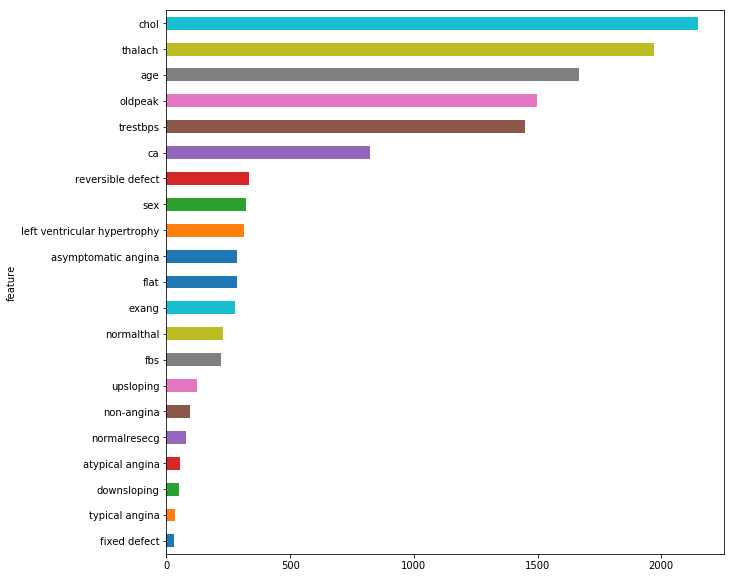

In [15]:
importance = xgb_model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

importance_df = pd.DataFrame(importance, columns=['feature', 'fscore'])

# Plot Feature Importance
plt.figure()
importance_df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(10, 10))

In [16]:
def feature_selection(dataframe, importance_scores_df, threshold=0.4):
    normalized_df = importance_scores_df.copy()
    normalized_df['fscore'] = (importance_scores_df['fscore'] - importance_scores_df['fscore'].min())/(importance_scores_df['fscore'].max()-importance_scores_df['fscore'].min())
    normalized_df = normalized_df[normalized_df['fscore'] >= threshold]
    new_dataframe = dataframe.filter(items=normalized_df['feature'].tolist())
    return new_dataframe

features_train_009_df = feature_selection(features_train_df, importance_df, threshold=0.09)
features_train_009 = features_train_009_df.as_matrix()
features_train_04_df = feature_selection(features_train_df, importance_df, threshold=0.4)
features_train_04 = features_train_04_df.as_matrix()

features_test_009_df = feature_selection(features_test_df, importance_df, threshold=0.09)
features_test_009 = features_test_009_df.as_matrix()
features_test_04_df = feature_selection(features_test_df, importance_df, threshold=0.4)
features_test_04 = features_test_04_df.as_matrix()

## Principal Component Analysis (by David)

In [17]:
from numpy import linalg as LA

def eigen_scores(dataframe):
    dataframe-=np.mean(dataframe, axis=0)
    dataframe/=np.std(dataframe, axis=0)
    cov_mat=np.cov(dataframe, rowvar=False)
    evals, evecs = np.linalg.eigh(cov_mat)
    idx = np.argsort(evals)[::-1]
    evecs = evecs[:,idx]
    evals = evals[idx]
    return evals, evecs

def my_pca(dataframe, n_components):
    pca=PCA(n_components=n_components)
    return pca.fit_transform(dataframe)
    
eigenvalues, eigenvectors = eigen_scores(features_test_04.copy())
n_components_04 = len(np.where(eigenvalues >= 1)[0])
print("Number of components for Dataset with threshold=0.4 is {}".format(n_components_04))

features_train_04_pca = my_pca(features_train_04, n_components_04)
features_test_04_pca = my_pca(features_test_04, n_components_04)

eigenvalues, eigenvectors = eigen_scores(features_test_009.copy())
n_components_009 = len(np.where(eigenvalues >= 1)[0])
print("Number of components for Dataset with threshold=0.09 is {}".format(n_components_009))

features_train_009_pca = my_pca(features_train_009, n_components_009)
features_test_009_pca = my_pca(features_test_009, n_components_009)

Number of components for Dataset with threshold=0.4 is 2
Number of components for Dataset with threshold=0.09 is 5


# Modelling And Training

We have an relatively small dataset. Therefore, we should do our feature selection based on a cross-
validated set. 

### SMOTE for SVM - Balancing only on the training set, not the validation set  [This is for the traditional training -not the cross validated one]

In [18]:
#further divide the 'traditional' non-cross set into training 80/20  for pure training and cross validation  
features_train_notoversampled, features_validate, labels_train_notoversampled, labels_validate = train_test_split(features_train, labels_train, test_size = .2, random_state=0)

sm = SMOTE(random_state=0, ratio = 1.0, kind= 'svm' )
#x_train_res, y_train_res = sm.fit_sample(x_train, y_train)
features_train_oversampled, labels_train_oversampled = sm.fit_sample(features_train_notoversampled, labels_train_notoversampled)

#re-enter into original variables
##features_train = features_train_oversampled
##labels_train = labels_train_oversampled

#Below 2 lines if we want to want to force the array back into dataframe    
##features_train = pd.DataFrame(features_train_oversampled,columns=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slop","ca","thal"])
##labels_train = pd.DataFrame(labels_train_oversampled,columns=["pred_attribute"])

C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


## Standard Scaler (by David)
SVC Models are only any good when the data is scaled. Lets scale the data and build the model

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

scaler = MinMaxScaler()
Standard_scaler = StandardScaler()
Robust_scaler = preprocessing.RobustScaler(quantile_range=(25, 75))
Quantile_scalar = preprocessing.QuantileTransformer(output_distribution='normal')

features_train = Standard_scaler.fit_transform(features_train)
features_test = Standard_scaler.transform(features_test)

features_train_009 = Standard_scaler.fit_transform(features_train_009)
features_test_009 = Standard_scaler.transform(features_test_009)

features_train_04 = Standard_scaler.fit_transform(features_train_04)
features_test_04 = Standard_scaler.transform(features_test_04)

features_train_009_pca = Standard_scaler.fit_transform(features_train_009_pca)
features_test_009_pca = Standard_scaler.transform(features_test_009_pca)

features_train_04_pca = Standard_scaler.fit_transform(features_train_04_pca)
features_test_04_pca = Standard_scaler.transform(features_test_04_pca)

features_train

array([[-1.19127179, -1.39664501, -0.55805859, ..., -0.21964884,
         0.91567545, -0.81934649],
       [-0.75808205,  0.71600156, -1.32901815, ..., -0.21964884,
         0.91567545, -0.81934649],
       [ 0.        , -1.39664501,  0.15783243, ..., -0.21964884,
         0.91567545, -0.81934649],
       ..., 
       [-2.05765127, -1.39664501,  0.32303804, ..., -0.21964884,
         0.91567545, -0.81934649],
       [-0.43318974,  0.71600156,  0.98386052, ..., -0.21964884,
        -1.09208999,  1.22048488],
       [ 0.86637948, -1.39664501,  0.43317512, ..., -0.21964884,
         0.91567545, -0.81934649]])

# Balancing only on the training set, not the validation set
Unfortunately SMOTE categorial implementation is not really implemented
We will do simple oversampling -> Done using external program SPSS 

In [22]:
# Export data to files for external program to balance the data

#without features selection
merged = np.concatenate((features_train, labels_train.reshape((-1, 1))), axis=1)
merged_df = pd.DataFrame(merged) 
merged_df.to_csv("data/train_NoEng_NB.csv", index=False)



#features_train_009
 
#features_train_04 

#features_train_009_pca 

#features_train_04_pca

In [23]:
df = pd.read_csv("data/train_noEng_Balanced.csv")

labels_train_df = df.iloc[:, 22:23]
df.drop(df.columns[[-1,]], axis=1, inplace=True)

features_train = df.as_matrix()
labels_train = labels_train_df.as_matrix()

#print(features_train)
#print(labels_train)

In [24]:

from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
#from sklearn import grid_search
#from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import mean_squared_error
import seaborn as sns
from scipy.stats import reciprocal, uniform

def checkmetrics(pred, labels_test, name):
    sns.set()
    print('The accuracy of ', name, 'is: ', accuracy_score(pred, labels_test))
    matrix = confusion_matrix(labels_test, pred)
    ax = sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
    print(ax)
    print(classification_report(pred, labels_test))

## Feature selection?

In [25]:
# Feature selection using RFECV to pick best features,
from sklearn.svm import SVR
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RandomizedLasso
from sklearn.feature_selection import RFECV
rlasso = RandomizedLasso(alpha=0.025)
names = features_list
rlasso.fit(features_train, labels_train)
 
print("Features sorted by their score using lasso:")
print(sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), 
                 names), reverse=True))

#use linear regression as the model
lr = LinearRegression()
#rank all features, i.e continue the elimination until the last one
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(X,Y)
 
print("Features sorted by their score using Linear Regression:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

Features sorted by their score using lasso:
[(0.495, 'thalach'), (0.46999999999999997, 'exang'), (0.45000000000000001, 'age'), (0.44500000000000001, 'oldpeak'), (0.29999999999999999, 'fbs'), (0.185, 'ca'), (0.059999999999999998, 'cp'), (0.0050000000000000001, 'slope'), (0.0050000000000000001, 'restecg'), (0.0, 'trestbps'), (0.0, 'thal'), (0.0, 'sex'), (0.0, 'class'), (0.0, 'chol')]
Features sorted by their score using Linear Regression:
[(1, 'class'), (3, 'oldpeak'), (5, 'exang'), (7, 'restecg'), (8, 'sex'), (9, 'thal'), (10, 'thalach'), (12, 'ca'), (17, 'slope'), (18, 'chol'), (19, 'cp'), (20, 'age'), (21, 'fbs'), (22, 'trestbps')]


C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Modelling with HyperParameters -Tuning - Default Dataset

Fitting 5 folds for each of 22 candidates, totalling 110 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 110 out of 110 | elapsed:    1.9s finished


The train score: 0.929824561404 with parameters: {'C': 1, 'class_weight': 'balanced', 'gamma': 0.1}
The accuracy of  C-Support Vector Classification is:  0.733333333333
Axes(0.125,0.125;0.62x0.755)
             precision    recall  f1-score   support

        0.0       0.80      0.83      0.81        29
        1.0       0.50      0.46      0.48        13
        2.0       0.90      0.82      0.86        11
        3.0       1.00      0.60      0.75         5
        4.0       0.40      1.00      0.57         2

avg / total       0.76      0.73      0.74        60



C:\Users\RyanT\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


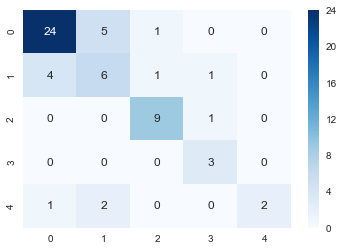

In [27]:
#svm.SVC  C-Support Vector Classification.
parameters ={
        'C': [0.1,1], 
        'gamma': [0.00001,0.01,0.05,0.1,0.2,0.5,1,2,3,4,5],
        "class_weight": ['balanced']
        }
SVM = svm.SVC()

grid_search_cv = GridSearchCV(SVM, parameters, cv=5,n_jobs=-1, return_train_score=True, refit=True,verbose=1)
grid_search_cv.fit(features_train, labels_train)
resultsdf=pd.DataFrame(grid_search_cv.cv_results_)
print("The train score:", str(grid_search_cv.score(features_train, labels_train)), "with parameters:", grid_search_cv.best_params_)
pred = grid_search_cv.best_estimator_.predict(features_test)

checkmetrics(pred, labels_test, 'C-Support Vector Classification')

In [ ]:
parameters ={
    'C': [0.1,0.2,0.5,1,2,3,4,5], 
    'gamma': [0.00001,0.01,0.05,0.1,0.2,0.5,1,2,3,4,5],
#    "class_weight": ['balanced', None]
}


SVM = svm.SVC(kernel="linear")
grid_search_cv = GridSearchCV(SVM, parameters, cv=10)
grid_search_cv.fit(features_train, labels_train)

print("The train score:", str(grid_search_cv.score(features_train, labels_train)), "with parameters:", grid_search_cv.best_params_)

pred = grid_search_cv.predict(features_test)
checkmetrics(pred, labels_test, 'No SMOTE - sq hinge - Validate - support vector machine linear')

In [ ]:
# Compare with one-versus all:
parameters ={
    'C': [0.1,0.2,0.5,1,2,3,4,5],
#    "class_weight": ['balanced', None],
    'gamma': [0.00001,0.01,0.05,0.1,0.2,0.5,1,2,3,4,5], 
             'decision_function_shape': ['ovo', 'ovr']
}
SVM = svm.SVC(kernel="linear")
grid_search_cv = GridSearchCV(SVM, parameters, cv=10)
grid_search_cv.fit(features_train, labels_train)

print("The train score for ovo:", str(grid_search_cv.score(features_train, labels_train)), 'with parameters:', grid_search_cv.best_params_)
pred = grid_search_cv.predict(features_test)
checkmetrics(pred, labels_test, 'No SMOTE - sq hinge, one vs one - Validate - support vector machine linear')

Try different model (standard one vs. rest) loss not automatically being squared hinge:

In [ ]:
parameters = {
    'C': [0.1,0.2,0.5,1,2,3,4,5],
#    "class_weight": ['balanced', None]
}
SVM = LinearSVC(loss="hinge")
grid_search = GridSearchCV(SVM, parameters, cv=10)
grid_search.fit(features_train, labels_train)

print("The train score: ", str(grid_search.score(features_train, labels_train)), 'with parameters:', grid_search.best_params_)

pred = grid_search.predict(features_test)
checkmetrics(pred, labels_test, 'No SMOTE - hinge - Validate - support vector machine linear')

In [ ]:
# Compare with Cramer:
parameters = {
    'C': [0.1,0.2,0.5,1,2,3,4,5],
#    "class_weight": ['balanced', None],
    'multi_class':['ovr', 'crammer_singer']
}
SVM = LinearSVC(loss="hinge")
grid_search = GridSearchCV(SVM, parameters, cv=10)
grid_search.fit(features_train, labels_train)

print("The train score: ", str(grid_search.score(features_train, labels_train)), 'with parameters:', grid_search.best_params_)

pred = grid_search.predict(features_test)
checkmetrics(pred, labels_test, 'No SMOTE - hinge, one vs rest - Validate - support vector machine linear')

## Nonlinear SVM Classification
### Polynominal features

Note that when there are multiple features, Polynomial Regression is capable of finding relationships
between features (which is something a plain Linear Regression model cannot do). This is made possible
by the fact that PolynomialFeatures also adds all combinations of features up to the given degree. 

In [ ]:
# HOW GRIDSEARCH SHOULD WORK
parameters = {
    'C': [0.1,0.2,0.5,1,2,3,4,5], 
    'gamma': [0.00001,0.01,0.05,0.1,0.2,0.5,1,2,3,4,5],
    "degree": [1,2,3],
    "coef0": [1,10]
}
SVM = svm.SVC(kernel="poly")
grid_search = GridSearchCV(SVM, parameters, cv=10)
grid_search.fit(features_train, labels_train)

print("The train score:", str(grid_search.score(features_train, labels_train)), "with parameters:", grid_search.best_params_)

pred = grid_search.predict(features_test)
checkmetrics(pred, labels_test, 'No SMOTE - sq hinge - Validate - support vector machine linear')

### RBF Kernel

In [ ]:
# Just like the polynomial features method, the similarity features method can be useful with any Machine
# Learning algorithm, but it may be computationally expensive to compute all the additional features,
# especially on large training sets. However, once again the kernel trick does its SVM magic: it makes it
# possible to obtain a similar result as if you had added many similarity features, without actually having to
# add them

parameters ={
    'C': [0.1,0.2,0.5,1,2,3,4,5], 
    'gamma': [0.00001,0.01,0.05,0.1,0.2,0.5,1,2,3,4,5],         
#    "class_weight": ['balanced', None]
}
SVM = svm.SVC(kernel="rbf")
grid_search = GridSearchCV(SVM, parameters, cv=10)
grid_search.fit(features_train, labels_train)

print("The train score:", str(grid_search.score(features_train, labels_train)), "with parameters:", grid_search.best_params_)

pred = grid_search.predict(features_test)
checkmetrics(pred, labels_test, 'No SMOTE - sq hinge - Validate - support vector machine linear')

# no need to compare with one vs all

# Using Important Features with threshold >= 0.09  (XGB)

### RBF Kernel

In [ ]:
# Just like the polynomial features method, the similarity features method can be useful with any Machine
# Learning algorithm, but it may be computationally expensive to compute all the additional features,
# especially on large training sets. However, once again the kernel trick does its SVM magic: it makes it
# possible to obtain a similar result as if you had added many similarity features, without actually having to
# add them

parameters ={
    'C': [0.1,0.2,0.5,1,2,3,4,5], 
    'gamma': [0.00001,0.01,0.05,0.1,0.2,0.5,1,2,3,4,5],         
#    "class_weight": ['balanced', None]
}
SVM = svm.SVC(kernel="rbf")
grid_search = GridSearchCV(SVM, parameters, cv=10)
grid_search.fit(features_train_009, labels_train)

print("The train score:", str(grid_search.score(features_train_009, labels_train)), "with parameters:", grid_search.best_params_)

pred = grid_search.predict(features_test_009)
checkmetrics(pred, labels_test, 'No SMOTE - sq hinge - Validate - support vector machine linear')

# no need to compare with one vs all

# Using Important Features with threshold >= 0.4 (XGB)

### RBF Kernel

In [ ]:
# Just like the polynomial features method, the similarity features method can be useful with any Machine
# Learning algorithm, but it may be computationally expensive to compute all the additional features,
# especially on large training sets. However, once again the kernel trick does its SVM magic: it makes it
# possible to obtain a similar result as if you had added many similarity features, without actually having to
# add them

parameters ={
    'C': [0.1,0.2,0.5,1,2,3,4,5], 
    'gamma': [0.00001,0.01,0.05,0.1,0.2,0.5,1,2,3,4,5],         
#    "class_weight": ['balanced', None]
}
SVM = svm.SVC(kernel="rbf")
grid_search = GridSearchCV(SVM, parameters, cv=10)
grid_search.fit(features_train_04, labels_train)

print("The train score:", str(grid_search.score(features_train_04, labels_train)), "with parameters:", grid_search.best_params_)

pred = grid_search.predict(features_test_04)
checkmetrics(pred, labels_test, 'No SMOTE - sq hinge - Validate - support vector machine linear')

# no need to compare with one vs all

# Using PCA with Important Features (threshold >= 0.09) (XGB)

### RBF Kernel

In [ ]:
# Just like the polynomial features method, the similarity features method can be useful with any Machine
# Learning algorithm, but it may be computationally expensive to compute all the additional features,
# especially on large training sets. However, once again the kernel trick does its SVM magic: it makes it
# possible to obtain a similar result as if you had added many similarity features, without actually having to
# add them

parameters ={
    'C': [0.1,0.2,0.5,1,2,3,4,5], 
    'gamma': [0.00001,0.01,0.05,0.1,0.2,0.5,1,2,3,4,5],         
#    "class_weight": ['balanced', None]
}
SVM = svm.SVC(kernel="rbf")
grid_search = GridSearchCV(SVM, parameters, cv=10)
grid_search.fit(features_train_009_pca, labels_train)

print("The train score:", str(grid_search.score(features_train_009_pca, labels_train)), "with parameters:", grid_search.best_params_)

pred = grid_search.predict(features_test_009_pca)
checkmetrics(pred, labels_test, 'No SMOTE - sq hinge - Validate - support vector machine linear')

# no need to compare with one vs all

# Using PCA with Important Features (threshold >= 0.4) by David (XGB)

### RBF Kernel

In [ ]:
# Just like the polynomial features method, the similarity features method can be useful with any Machine
# Learning algorithm, but it may be computationally expensive to compute all the additional features,
# especially on large training sets. However, once again the kernel trick does its SVM magic: it makes it
# possible to obtain a similar result as if you had added many similarity features, without actually having to
# add them

parameters ={
    'C': [0.1,0.2,0.5,1,2,3,4,5], 
    'gamma': [0.00001,0.01,0.05,0.1,0.2,0.5,1,2,3,4,5],         
#    "class_weight": ['balanced', None]
}
SVM = svm.SVC(kernel="rbf")
grid_search = GridSearchCV(SVM, parameters, cv=10)
grid_search.fit(features_train_04_pca, labels_train)

print("The train score:", str(grid_search.score(features_train_04_pca, labels_train)), "with parameters:", grid_search.best_params_)

pred = grid_search.predict(features_test_04_pca)
checkmetrics(pred, labels_test, 'No SMOTE - sq hinge - Validate - support vector machine linear')

# no need to compare with one vs all